In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import scipy.ndimage as ndimage
from astropy.visualization import simple_norm
from photutils.detection import find_peaks
import photutils.psf as psf

import stuff
# import fwhm
import importlib

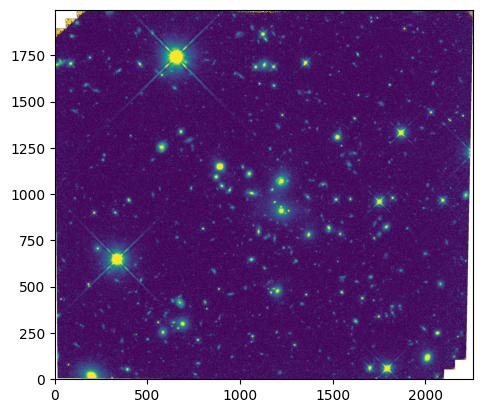

In [29]:
# replace with your file
f=fits.open('/Users/oscar/LB/grav_lens/test_images/Desi/desi_238.fits') 
imR=f[1].data
f.close()
imR[imR<0]=0
norm = simple_norm(imR, 'sqrt', percent=99.)
plt.imshow(imR, norm=norm, origin='lower', cmap='viridis')


In [18]:
# change threshold value
peaks_tbl = find_peaks(imR, threshold=40, box_size=20)  
peaks_tbl['peak_value'].info.format = '%.8g'
print(peaks_tbl)  

 id x_peak y_peak peak_value
--- ------ ------ ----------
  1   2063     13  46.985435
  2   2064     13  46.985435
  3   2063     14  46.985435
  4   2064     14  46.985435
  5   2064     15  46.985435
  6   1795     57  599.11743
  7   1701     61  69.844414
  8    337    646   4277.166
  9   1752    957  205.85056
 10   2094    964  72.179817
...    ...    ...        ...
 18     59   1901  87.752701
 19     60   1901  87.752701
 20     75   1938  591.56042
 21     76   1938  591.56042
 22     75   1939  591.56042
 23     76   1939  591.56042
 24   2193   1956  487.03494
 25   2194   1956  487.03494
 26   2193   1957  487.03494
 27   2194   1957  487.03494
Length = 27 rows


27 stars


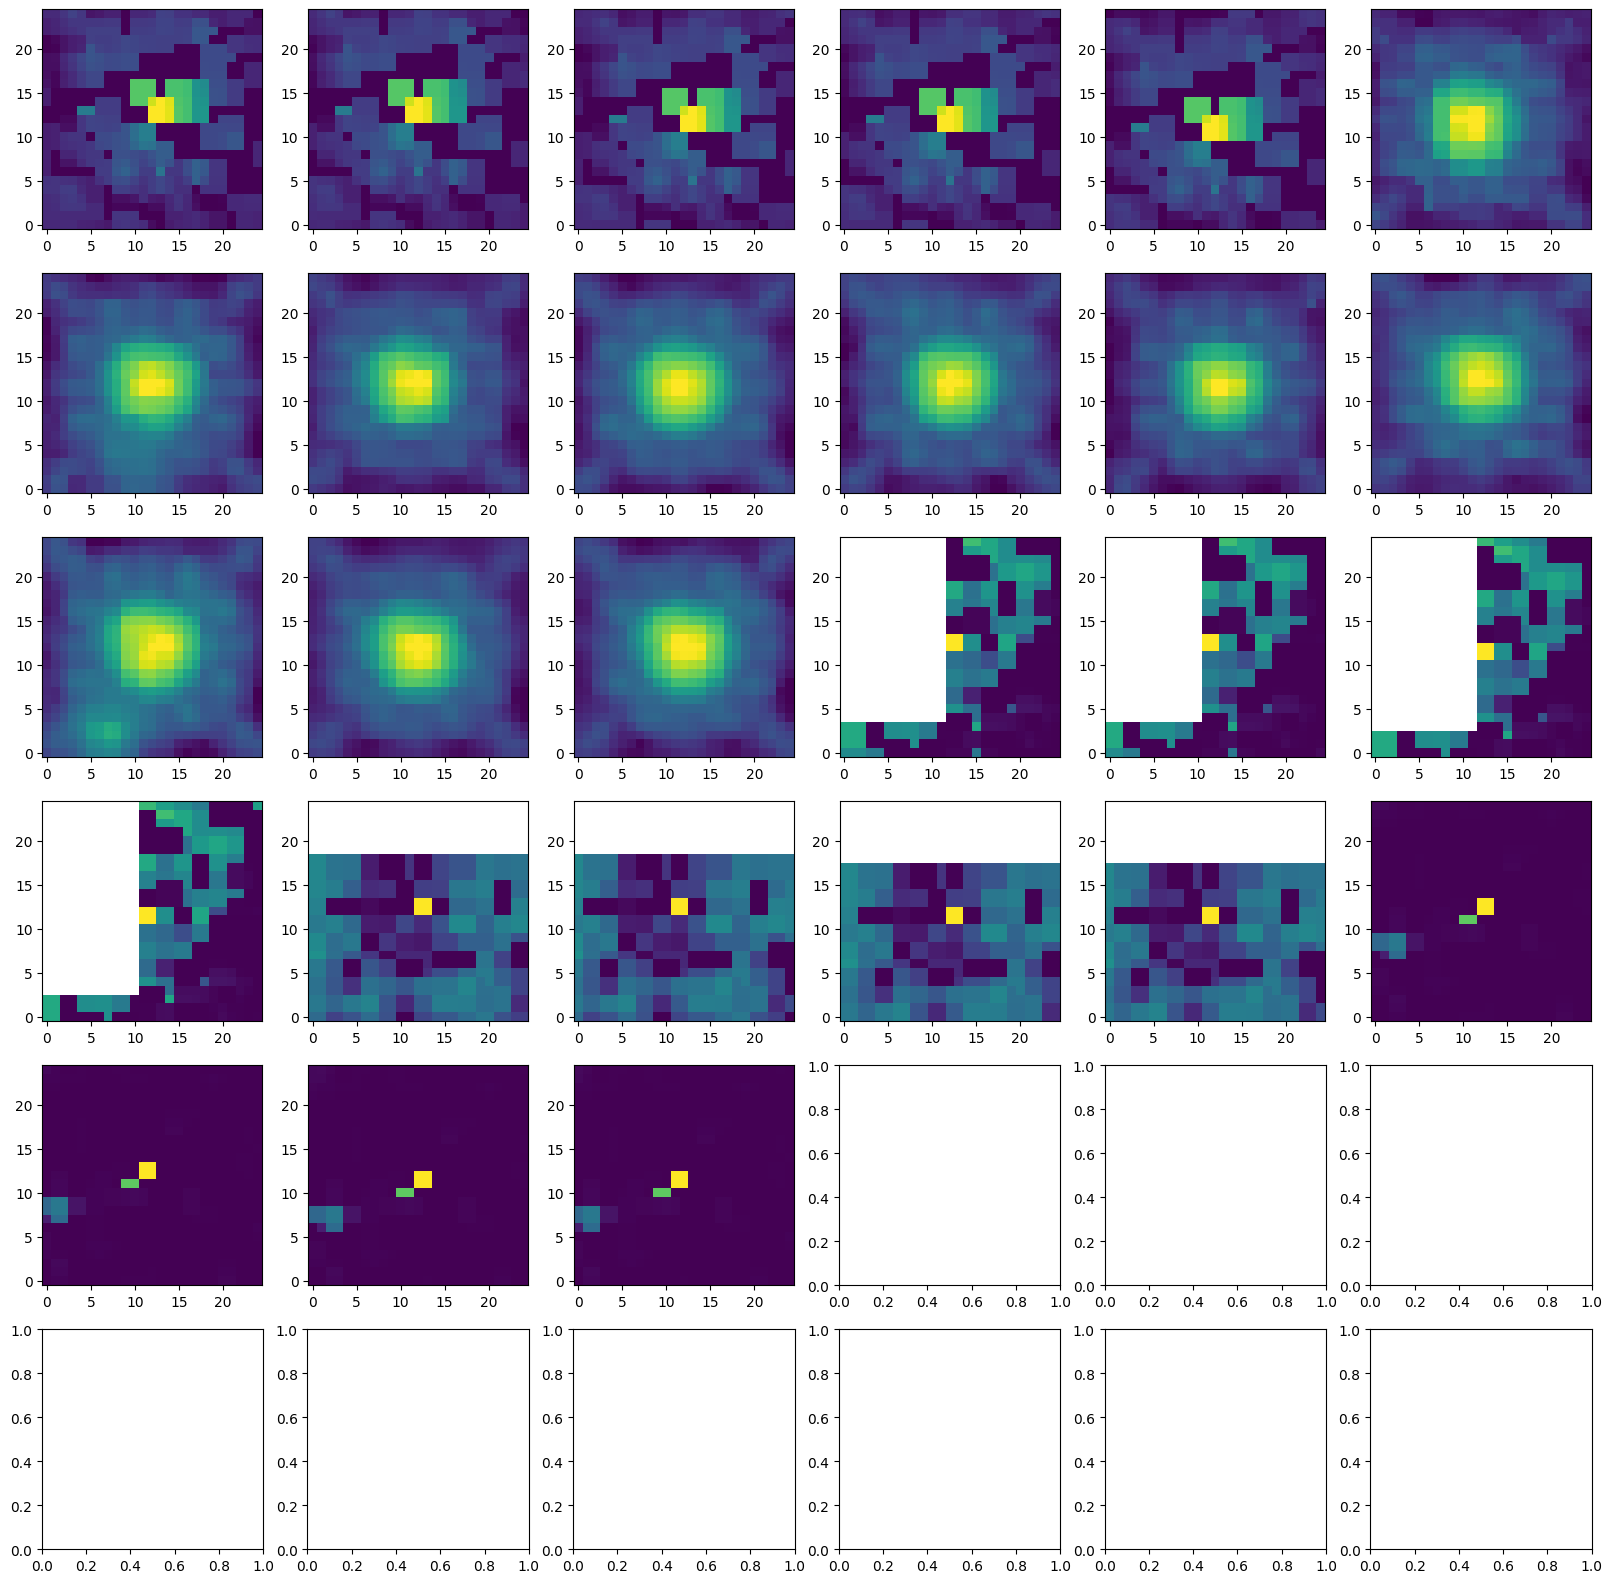

In [19]:
stars = stuff.coordsToStars(imR, peaks_tbl)

EPSFBuilder (10 maxiters):  60%|██████    | 6/10 [00:00<00:00, 60.24it/s]

EPSFBuilder converged after 6 iterations (of 10 maximum iterations)


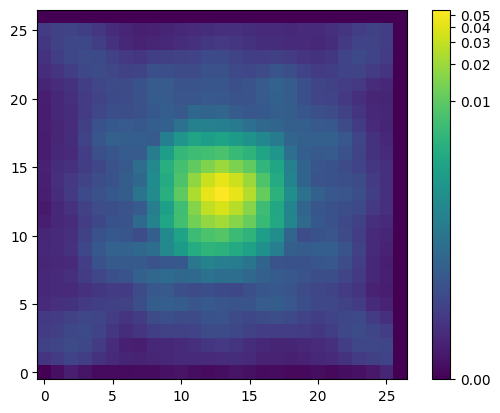

In [28]:
#look at the output above and decide which ones you want
starsIWant = np.r_[5:14]

builder= psf.EPSFBuilder(maxiters=10,oversampling=1)
epsf, fitted_stars = builder.build_epsf(stars[5:14])

norm = simple_norm(epsf.data, 'log', percent=100.0)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

pee_ess_eff = fits.PrimaryHDU(epsf.data)
pee_ess_eff.writeto('psf238.fits',overwrite=True)